Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2
Missing -100 tasks for ngen 2


Text(0, 0.5, 'Run time of generation (s)')

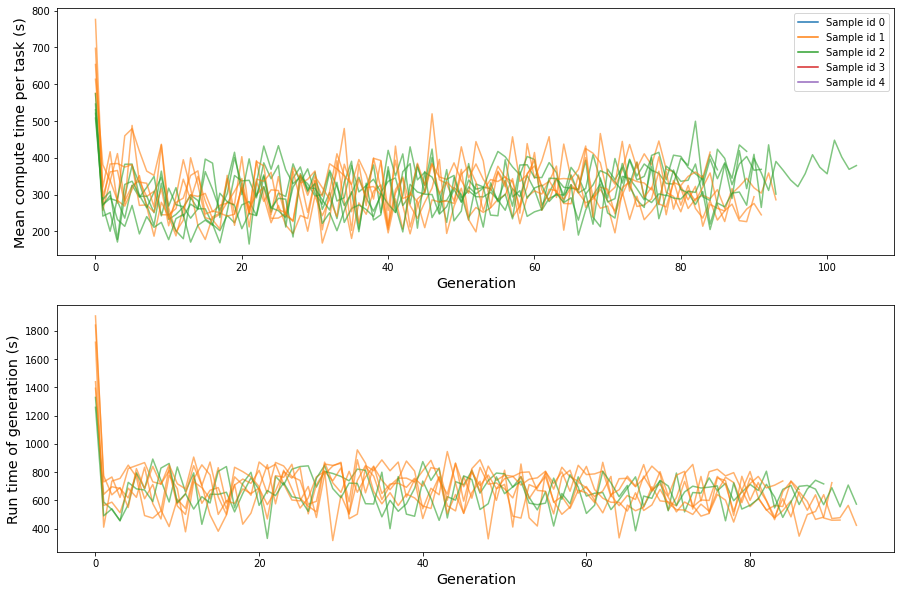

In [12]:
from analyse_log import analyse_log
import matplotlib.pyplot as plt
import numpy
import glob

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

for fl in glob.glob('./logs/*.stdout'):
#for fl in glob.glob('/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/logs/*.stdout'):
    
    path_params = fl[:-7] + '/params.dat'
    with open(path_params, 'r') as fp:
        lines = fp.readlines()

    sample_id = int(lines[2])
        
    gen = analyse_log(fl)
    
    meann = [numpy.mean(g['tasks']) for g in gen][:-1]
    axs[0].plot(
        [i for i in range(len(meann))],
        meann,
        #yerr=[numpy.std(g['tasks']) for g in gen],
        alpha=0.6,
        color=f"C{sample_id}",
    )
    
    try:
        maxx = [numpy.max(g['tasks']) for g in gen if len(g)][:-1]
        
        axs[1].plot(
            [i for i in range(len(maxx))],
            maxx,
            alpha=0.6,
            color=f"C{sample_id}"
        )
        
    except:
        pass
    
for i in range(5):
    axs[0].plot([20, 20], [300, 300], color=f"C{i}", label=f"Sample id {i}")

axs[0].set_xlabel('Generation', size='x-large')
axs[0].set_ylabel('Mean compute time per task (s)', size='x-large')
axs[0].legend()
axs[1].set_xlabel('Generation', size='x-large')
axs[1].set_ylabel('Run time of generation (s)', size='x-large')

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import os
import pickle
import glob

from scipy.spatial.distance import cosine

import l5pc_model
import l5pc_evaluator

In [3]:
def load_checkp(path):
    
    try:
        chkp_name = os.path.basename(path)[:-4]
        chkp_name = chkp_name.split('_')

        feature_set = chkp_name[0]
        seed = chkp_name[-1][:1]
        
        sample_id = path.split("/")[-2]
        sample_id = sample_id.strip("random_")

        with open(path, 'rb') as fp:
            run = pickle.load(fp)
        
        run = {"nevals": numpy.cumsum(run['logbook'].select("nevals")),
               "population": run['population'],
               "hof": run['halloffame'],
               "logbook": run['logbook'],
               "sample_id": sample_id,
               "seed": seed,
               "feature_set": feature_set,
               "best_fitness": numpy.sum(run['halloffame'][0].fitness.values),
               "best_scores": list(run['halloffame'][0].fitness.values),
               "best_params": list(run['halloffame'][0]),
               "path": path}
        
        return run
        
    except:      
        return None

In [ ]:
runs = []
for path in glob.glob('/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/**/*.pkl', recursive=True):

    run = load_checkp(path)
    if run:
        print(path)
        runs.append(run)
    else:
        print("Failed to read ", path)

/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_4/extra_off250_ngen20000_map-linearchan_4seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_4/bap_off250_ngen20000_map-linearchan_5seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_4/bap_off250_ngen20000_map-linearchan_1seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_4/soma_off250_ngen20000_map-linearchan_4seed.pkl
Failed to read  /gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_4/soma_off250_ngen20000_map-linearchan_

/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_1/extra_off250_ngen20000_map-linearchan_3seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_2/extra_off250_ngen20000_map-linearchan_4seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_2/bap_off250_ngen20000_map-linearchan_5seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_2/bap_off250_ngen20000_map-linearchan_1seed.pkl
/gpfs/bbp.cscs.ch/data/project/.snapshots/proj_daily-2020.10.08-03.49.12/proj38/home/damart/LFPy/multimodalfitting/l5pc_multimodal/checkpoints/random_2/soma_off250_ngen20000_map-linearchan_4seed.pkl
Faile

In [ ]:
ids = set([run["sample_id"] for run in runs]) 
colors = {i: "C{}".format(i) for i in ids}
colors_set = {"extra": "C0", "bap": "C1", "soma": "C2"}

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for run in runs:

    ax.plot(run["nevals"], 
            run["logbook"].select("min"),
            color=colors[run["sample_id"]],
            ls='--', 
            lw=0.5,
            alpha=0.75)
    
    ax.scatter([run["nevals"][-1]], 
               [numpy.sum(run["hof"][0].fitness.values)],
               color=colors[run["sample_id"]],
               alpha=0.75)
    
ax.set_xlabel("Number of evaluations", size="x-large")
ax.set_ylabel("Minimum fitness (std)", size="x-large")

ax.set_yscale("log")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for run in runs:

    ax.plot(run["nevals"], 
            run["logbook"].select("min"),
            color=colors_set[run["feature_set"]],
            ls='--', 
            lw=0.5,
            alpha=0.75)
    
    ax.scatter([run["nevals"][-1]], 
               [numpy.sum(run["hof"][0].fitness.values)],
               color=colors_set[run["feature_set"]],
               alpha=0.75)
    
ax.set_xlabel("Number of evaluations", size="x-large")
ax.set_ylabel("Minimum fitness (std)", size="x-large")

ax.set_yscale("log")
#ax.set_ylim(5, 20)
plt.legend()

In [ ]:
runs_selected = []
for feature_set in ['extra', 'bap', 'soma']:
    
    for sample_id in ["0", "1", "2", "3", "4"]:
        
        run_set = [run for run in runs if run['feature_set'] == feature_set and run['sample_id'] == sample_id]
        fit = [run['best_fitness'] for run in run_set]
        
        avg = numpy.mean(fit)
        print(feature_set, sample_id, avg, len(run_set))

        fit, run_set = zip(*sorted(zip(fit, run_set)))
        
        run_selected = run_set[:5]
        print(numpy.mean( [run['best_fitness'] for run in run_selected]))
        print()
        #for run in runs:
        runs_selected += run_selected
        
runs = runs_selected

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

for run in runs:

    ax.plot(run["nevals"], 
            run["logbook"].select("min"),
            color=colors_set[run["feature_set"]],
            ls='--', 
            lw=0.5,
            alpha=0.75)
    
    ax.scatter([run["nevals"][-1]], 
               [numpy.sum(run["hof"][0].fitness.values)],
               color=colors_set[run["feature_set"]],
               alpha=0.75)
    
ax.set_xlabel("Number of evaluations", size="x-large")
ax.set_ylabel("Minimum fitness (std)", size="x-large")

ax.set_yscale("log")
plt.legend()

/gpfs/bbp.cscs.ch/home/damart/venv_lfpy/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


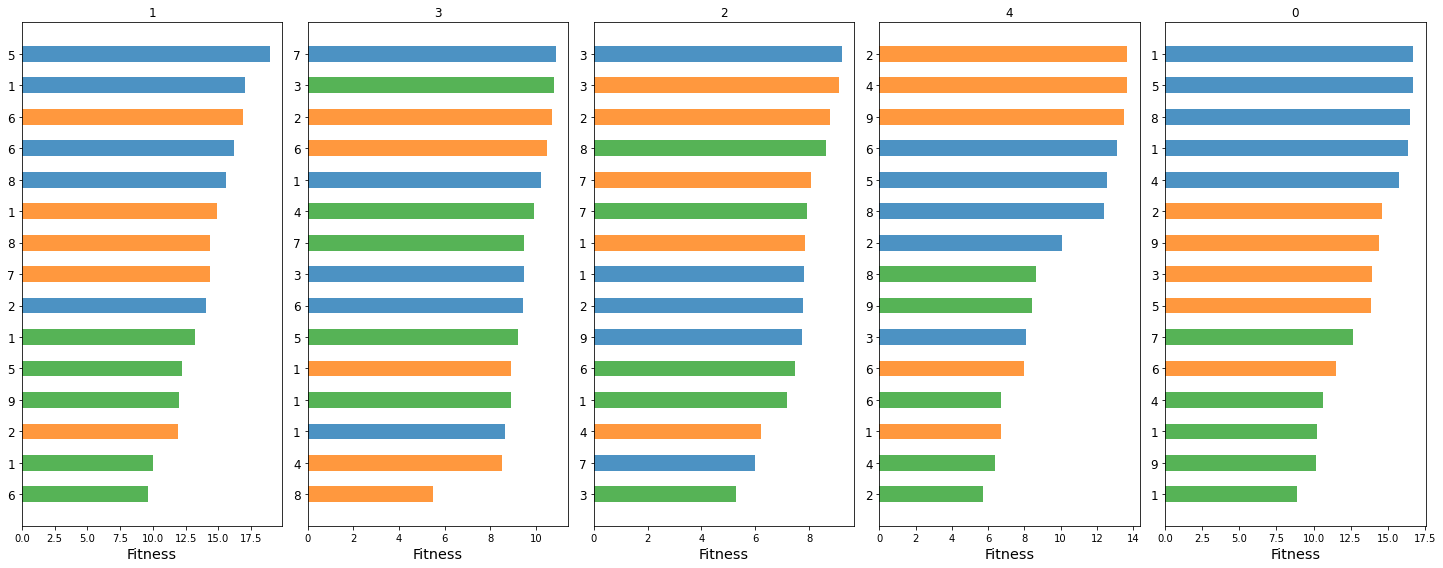

In [21]:
fig, ax = plt.subplots(1, len(ids), figsize=(20,8))

for i, sample_id in enumerate(ids):

    ordered_runs = list([run for run in runs if run['sample_id'] == sample_id])
    ordered_runs = sorted(ordered_runs, key=lambda kv: kv['best_fitness'])
    
    labels = [run['seed'] for run in ordered_runs]
    ytick_pos = [x for x in range(len(labels))]
    clrs = [colors_set[run['feature_set']] for run in ordered_runs]
    
    for pos, fit, es, c in zip(ytick_pos, ordered_runs, labels, clrs):
        ax[i].barh([pos],
                   [fit['best_fitness']],
                   height=0.5,
                   align='center',
                   color=c,
                   alpha=0.8)

    ax[i].set_yticks(ytick_pos, [])
    ax[i].set_yticklabels(labels, size='large')
    ax[i].set_xlabel("Fitness", size="x-large")
    ax[i].set_ylim(-1, len(labels))
    ax[i].set_title(sample_id)
    
plt.tight_layout()

In [22]:
# Get the target random params for all sample_ids
random_params_file = 'config/params/random.csv'
random_params = pd.read_csv(random_params_file, index_col='index')
gt_params = {i: random_params.iloc[int(i)].to_dict() for i in ids}

In [24]:
# Add an evaluator to each run and compute the distance to the original parmeter set
for i, run in enumerate(runs):
    
    prep = l5pc_evaluator.prepare_optimization(
        feature_set=run['feature_set'], 
        sample_id=run['sample_id'], 
        offspring_size=1, 
        channels='map',
        probe_type='linear',                             
        map_function = None)

    runs[i]['params_name'] = prep['evaluator'].param_names

    original_params = numpy.asarray([gt_params[run["sample_id"]][k] for k in prep['evaluator'].param_names])
    fitted_params = numpy.asarray(list(run["hof"][0]))
    runs[i]["distance"] = cosine(original_params, fitted_params)
    runs[i]["population_distance"] = [
        cosine(original_params, numpy.asarray(list(ind))) for ind in runs[i]['population']
    ]
        
    original_params = numpy.asarray([gt_params[run["sample_id"]][k] for k in prep['evaluator'].param_names if 'apical' in k])
    fitted_params = numpy.asarray([run["hof"][0][j] for j, k in enumerate(prep['evaluator'].param_names) if 'apical' in k])
    runs[i]["apical_distance"] = cosine(original_params, fitted_params)
    runs[i]["population_distance_apical"] = [
        cosine(original_params, numpy.asarray([ind[j] for j, k in enumerate(prep['evaluator'].param_names) if 'apical' in k])) for ind in runs[i]['population']
    ]
        

0.016235261599138462 0.006885103220126809
0.12645511812744592 0.1247208477690791
0.05146835411706285 0.05062318401410071
0.5674984185489904 0.5678249727686275
0.00456882011374915 0.0037267987854970874
0.0003511460916177933 0.0003511460916177933
0.10200485677024174 0.10200460573083492
0.015668857448724594 0.01394928184069344
0.025933514927157453 0.025933514570912752
0.00037380498265615625 0.0003434363850144395
0.0035504973576094834 0.00355049735760693
0.05810157387811543 0.05808711279819834
0.009965127984733257 0.009820105393347212
0.056253297902961075 0.056253297900178634
0.0005855315285808738 0.0004848639165284663
0.02291690501752186 0.022324950797635523
0.002461567923315866 0.0005795004314529395
0.6494588795277496 0.6492062011315916
0.05261124167379283 0.05249419852016435
0.008484533208736877 0.006897991682763394
0.0018970632837937984 0.0018959463514673924
0.18297906214195236 0.18289948575986048
0.009421602713565291 0.009421602713365007
0.027136171456420777 0.02713608590987837
0.0062

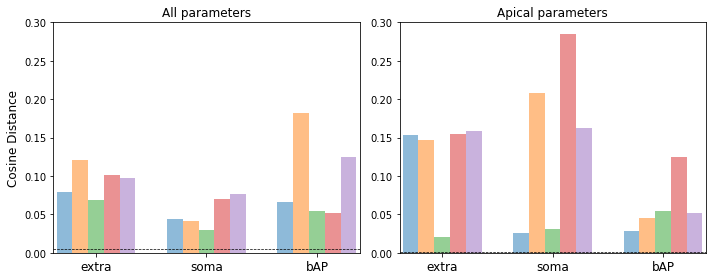

In [30]:
# Compute error between optimization and original params
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for sample_id in range(0, 5):
    
    errors = {'extra': [], 'soma': [], 'bap': []} 
    errors_apical = {'extra': [], 'soma': [], 'bap': []}
    for run in runs:
        if int(run['sample_id']) == sample_id:
            errors[run['feature_set']].append(run['distance'])
            errors_apical[run['feature_set']].append(run['apical_distance'])
            print(run['apical_distance'], numpy.min(run['population_distance_apical']))
    for i, (k, v) in enumerate(errors.items()):
        axs[0].bar([(0.7*i)+(sample_id*0.1)], 
                [numpy.mean(v)], 
                width=0.1,
                color="C{}".format(sample_id),
                alpha=0.5)

    for i, (k, v) in enumerate(errors_apical.items()):
            axs[1].bar([(0.7*i)+(sample_id*0.1)], 
                    [numpy.mean(v)], 
                    width=0.1,
                    color="C{}".format(sample_id),
                    alpha=0.5)

# Difference between the five original sample_id for reference
dist = []
dist_apical = []
for i in range(0, 5):
    for j in range(0, 5):
        if i > j:
            dist.append(cosine(list(gt_params[str(i)].values()), 
                               list(gt_params[str(j)].values())))
            p1 = [p for n, p in gt_params[str(i)].items() if 'apical' in n]
            p2 = [p for n, p in gt_params[str(j)].items() if 'apical' in n]
            dist_apical.append(cosine(p1, p2))           
axs[0].plot([-0.07, 1.87], [numpy.mean(dist), numpy.mean(dist)], ls='--', lw=0.7, c='black', label='Mean inter-sample_id')
axs[1].plot([-0.07, 1.87], [numpy.mean(dist_apical), numpy.mean(dist_apical)], ls='--', lw=0.7, c='black')

for ax in axs:
    ax.set_xticks(ticks=[0.2, 0.2+0.7, 0.2+1.4])
    ax.set_xticklabels(labels=['extra', 'soma', 'bAP'], size='large')
    ax.set_ylim(0., 0.3)
    ax.set_xlim(-0.07, 1.87)

axs[0].set_ylabel("Cosine Distance", size='large')
axs[0].set_title('All parameters', size='large')
axs[1].set_title('Apical parameters', size='large')

plt.tight_layout()
plt.savefig('cosine.pdf', dpi=200, bbox_inches='tight')

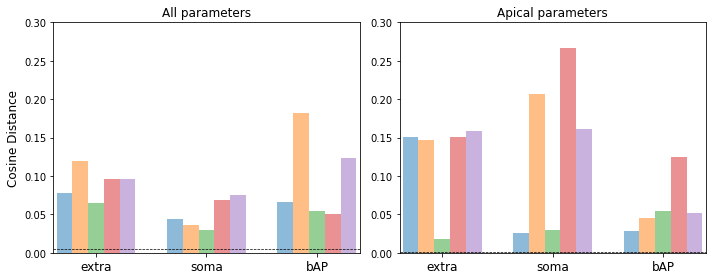

In [29]:
# Compute error between optimization and original params
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for sample_id in range(0, 5):
    
    errors = {'extra': [], 'soma': [], 'bap': []} 
    errors_apical = {'extra': [], 'soma': [], 'bap': []}
    for run in runs:
        if int(run['sample_id']) == sample_id:
            errors[run['feature_set']].append(numpy.min(run['population_distance']))
            errors_apical[run['feature_set']].append(numpy.min(run['population_distance_apical']))
            
    for i, (k, v) in enumerate(errors.items()):
        axs[0].bar([(0.7*i)+(sample_id*0.1)], 
                [numpy.mean(v)], 
                width=0.1,
                color="C{}".format(sample_id),
                alpha=0.5)

    for i, (k, v) in enumerate(errors_apical.items()):
            axs[1].bar([(0.7*i)+(sample_id*0.1)], 
                    [numpy.mean(v)], 
                    width=0.1,
                    color="C{}".format(sample_id),
                    alpha=0.5)

# Difference between the five original sample_id for reference
dist = []
dist_apical = []
for i in range(0, 5):
    for j in range(0, 5):
        if i > j:
            dist.append(cosine(list(gt_params[str(i)].values()), 
                               list(gt_params[str(j)].values())))
            p1 = [p for n, p in gt_params[str(i)].items() if 'apical' in n]
            p2 = [p for n, p in gt_params[str(j)].items() if 'apical' in n]
            dist_apical.append(cosine(p1, p2))           
axs[0].plot([-0.07, 1.87], [numpy.mean(dist), numpy.mean(dist)], ls='--', lw=0.7, c='black', label='Mean inter-sample_id')
axs[1].plot([-0.07, 1.87], [numpy.mean(dist_apical), numpy.mean(dist_apical)], ls='--', lw=0.7, c='black')

for ax in axs:
    ax.set_xticks(ticks=[0.2, 0.2+0.7, 0.2+1.4])
    ax.set_xticklabels(labels=['extra', 'soma', 'bAP'], size='large')
    ax.set_ylim(0., 0.3)
    ax.set_xlim(-0.07, 1.87)

axs[0].set_ylabel("Cosine Distance", size='large')
axs[0].set_title('All parameters', size='large')
axs[1].set_title('Apical parameters', size='large')

plt.tight_layout()
plt.savefig('cosine.pdf', dpi=200, bbox_inches='tight')

In [13]:
runs_out = runs[:]
for i in range(len(runs_out)):
    runs_out[i].pop('evaluator', None)
    runs_out[i].pop('objectives_calculator', None)
    runs_out[i].pop('protocols', None)
    runs_out[i].pop('evaluator', None)

with open("runs.pkl", 'wb') as fp:
    pickle.dump(runs_out, fp)